In [33]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
### 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
my_drive = GoogleDrive(gauth)

### delete gdrive trash files (keras checkpoint files can accumulate in trash) [[2023-06-03]]-0922-27
def clear_gdrive_trash():
    count=0
    # for a_file in my_drive.ListFile({'q': "title contains 'ckpt' and trashed = true"}).GetList():
    for a_file in my_drive.ListFile({'q': "trashed = true"}).GetList():
        count+=1
        # print the name of the file being deleted.
        pass
        # print(a_file['title'])
        print(f'the file {a_file["title"]}, is about to get deleted permanently.')
        # delete the file permanently.
        a_file.Delete()
    print(count)
clear_gdrive_trash()

0


In [5]:
### to mount google drive
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
### to download the dataset from kaggle
# !pip install kaggle
# ! mkdir ~/.kaggle
# ! cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download shyambhu/hands-and-palm-images-dataset

# ! mkdir /content/drive/MyDrive/ML-AI_capstone_project
# ! mkdir /content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/

# ### to copy the downloaded dataset to drive ; so that afterwards the dataset can be copied from drive instead of downloading from kaggle everytime.
# ! cp "/content/hands-and-palm-images-dataset.zip" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/"



In [7]:
! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models'

mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/models’: File exists


In [8]:
drive_project_folder_path='/content/drive/MyDrive/ML-AI_capstone_project'

In [9]:
### to copy the dataset zip file from drive to colab filesystem
! cp "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/hands-and-palm-images-dataset.zip" "/content/hands-and-palm-images-dataset.zip"

In [10]:
!unzip hands-and-palm-images-dataset.zip &> /dev/null

In [11]:
# ! du -sh "/content/hands-and-palm-images-dataset.zip"

In [12]:
# ! cp -r "/content/Hands" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi"
# ! cp "/content/HandInfo.csv" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi"


In [13]:
### copying directory of images directly from drive is slower that copying the zip file and then unziping [[2023-06-03]]-0924-45

# ! cp -r "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/Hands" "/content/Hands2"
# ! cp "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/HandInfo.csv" "/content/HandInfo.csv"

In [14]:
 
from tensorflow.keras.utils import image_dataset_from_directory


In [15]:
import pandas as pd
dataset_dir_path='/content/Hands/Hands'
df=pd.read_csv('HandInfo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


### EDA 

In [16]:
# df

In [17]:

## waste
# def get_raw_image(dataset_dir_path):
#     full_img_np =cv2.imread(f'{dataset_dir_path}/Hand_0000002.jpg')
#     return full_img_np.shape

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


In [19]:
# df.duplicated().sum() ## get number of duplicate rows

In [20]:
# df.drop(['imageName','id'],axis=1).mode() ### most common categories

In [21]:
from IPython.display import display, HTML


In [22]:
def display_histograms_subplots(df):
    value_counts_dict={}
    cols_to_exclude=['imageName','id']
    plt.figure(figsize=(10,10)).tight_layout(h_pad=2)
    count=0
    for col_name in df.columns.to_list():
        if col_name not in cols_to_exclude:
            value_counts_dict[col_name]=df[col_name].value_counts()
            print(f'value_counts of {col_name} ',value_counts_dict[col_name])
            count+=1
            plt.subplot(3,3,count)
            plt.gca().set_title(col_name)
            df[col_name].hist()
            # if col_name in ['age']:
            #     plt.figure()
            #     plt.title(col_name)
            #     plt.boxplot(df[col_name].to_list())
        # display(value_counts_dict[col_name])
        # display(HTML(value_counts_dict[col_name].to_html()))
# display_histograms_subplots(df)

In [23]:
def display_histograms(df):
    value_counts_dict={}
    cols_to_exclude=['imageName','id']
    for col_name in df.columns.to_list():
        if col_name not in cols_to_exclude:
            value_counts_dict[col_name]=df[col_name].value_counts()
            print(f'value_counts of {col_name} ',value_counts_dict[col_name])
            plt.figure()
            plt.title(col_name)
            df[col_name].hist()
            if col_name in ['age']:
                plt.figure()
                plt.title(col_name)
                plt.boxplot(df[col_name].to_list())
        # display(value_counts_dict[col_name])
        # display(HTML(value_counts_dict[col_name].to_html()))
# display_histograms(df)

In [24]:
# import matplotlib.pyplot as plt

'''
dataset_dir_path is path of folder with all hand images

'''

def display_sample_imgs_in_subplots(filenames_list,dataset_dir_path=dataset_dir_path,whole_fig_title=None, img_modify_fn=None):
    plt.figure(figsize=(10,8.5)).tight_layout(h_pad=2)
    # plt.figure(figsize=(10,8)).tight_layout(rect=[0, 0.03, 1, 0.7])

    
    if whole_fig_title != None:
        plt.suptitle(whole_fig_title) ## set main figure title

    if img_modify_fn == None:
        def img_modify_fn(img):
            return img ## if fn not specified do nothing

    last_i=0
    count=0
    for i,filename in enumerate(filenames_list):        
        if (i==0) or (i == last_i+18):
            count+=1
            last_i=i
            plt.subplot(3,3,count)
            image=plt.imread(f'{dataset_dir_path}/{filename}')
            image=img_modify_fn(image)
            plt.imshow(image)
            plt.gca().set_title(filename) ## to set title for subplot
            plt.axis("off")

        if count >= 9:
            break
    plt.show()




def display_column_images(col_name_list,df=df,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots):
    '''
    takes display_sample_imgs_in_subplots function as argument
    '''
    for col_name in col_name_list:
        print(f'\n{col_name}'.upper())
        irreg_imgs_names_list=df[df[col_name] != 0 ]['imageName'].to_list()
        print(df[col_name].value_counts())
        print(f'number of images with {col_name}',len(irreg_imgs_names_list))
        display_sample_imgs_in_subplots(irreg_imgs_names_list,whole_fig_title=col_name)





In [25]:


col_name_list=['irregularities','accessories','nailPolish']
# df=pd.read_csv('HandInfo.csv')
# display_column_images(col_name_list,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots) ###     takes display_sample_imgs_in_subplots function as argument


In [26]:
### edge map

# image=cv2.imread(f'{dataset_dir_path}/Hand_0000002.jpg')

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# wide = cv2.Canny(blurred, 10, 200)
# mid = cv2.Canny(blurred, 30, 150)
# tight = cv2.Canny(blurred, 240, 250)

# mid.shape
# plt.imshow(mid)

def get_edge_map(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    wide = cv2.Canny(blurred, 10, 200)
    mid = cv2.Canny(blurred, 30, 150)
    tight = cv2.Canny(blurred, 240, 250)
    return mid

img_filename_list_to_plot=df['imageName'].to_list()
# display_sample_imgs_in_subplots(img_filename_list_to_plot,whole_fig_title='EDGE MAP',img_modify_fn=get_edge_map)





In [27]:
def resize_to_reduce_male_hand_girth(img):
    resized_img=cv2.resize(img,(1200,1000))
    return resized_img

male_img_filenames=df[ df['gender'] == 'male' ]['imageName'].to_list()
female_img_filenames=df[ df['gender'] == 'female' ]['imageName'].to_list()

# display_sample_imgs_in_subplots(male_img_filenames,whole_fig_title='reduced male hand girth',img_modify_fn=resize_to_reduce_male_hand_girth)
# print('\n')
# display_sample_imgs_in_subplots(male_img_filenames,whole_fig_title='original imgs with male hand girth',img_modify_fn=None)
# print('\n')
# display_sample_imgs_in_subplots(female_img_filenames,whole_fig_title='females')


In [28]:
def make_img_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    # wide = cv2.Canny(blurred, 10, 200)
    # mid = cv2.Canny(blurred, 30, 150)
    # tight = cv2.Canny(blurred, 240, 250)
    return gray

img_filename_list_to_plot=df['imageName'].to_list()
# display_sample_imgs_in_subplots(img_filename_list_to_plot,whole_fig_title='GRAYSCALE',img_modify_fn=make_img_gray)




### END OF EDA

In [29]:



def get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df):

    '''
    this function is needed in order to make the list of target labels to give as labels argument of 
     the keras.utils.image_dataset_from_directory function. 
     The keras.utils.image_dataset_from_directory function makes a tensorflow dataset object from the images inside
     a folder. the labels argument should be a list of target variables corresponding to images filenames as listed by
     os.walk('dataset_directory_path') function.
    
    So what this function does is, to output a dictionary. The dictionary takes the column names in the HandInfo.csv as keys. 
    The value in the dictionary corresponding to the column name given as key in the dictionary, is a list,
    containing all the rows in the csv for that single column. The thing is the the rows in this list are ordered such
    that they correspond to the image_file in the order outputted by os.walk('dataset_directory_path').  

    '''
    df=csv_df.set_index('imageName')

    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    # print(list(walk(dataset_dir_path))[0][2][0])
    img_filenames_list=list(walk(dataset_dir_path))[0][2]
    col_val_list_in_order_file_names_dict={}


    for col in df.columns.to_list():
        col_val_list_in_order_file_names_dict[col]=[]

        for filename in img_filenames_list:
            
            col_val_list_in_order_file_names_dict[col].append(df[col][filename])
        # col_val_list_in_order_file_names_dict['gender']=df['gender'][df['imageName'][df['imageName']== filename ].index[0]]
    return col_val_list_in_order_file_names_dict

col_val_list_in_order_file_names_dict=get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df=df)
# def make_arr_of_images_and_labels():
#     pass

In [30]:
### get the num of color channels in the images
def find_num_channels_in_imgs(dataset_dir_path):
    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

    import cv2
    first_img_np=cv2.imread(f'{dataset_dir_path}/{list(walk(dataset_dir_path))[0][2][0]}')
    return first_img_np.shape[-1]
num_channels=find_num_channels_in_imgs(dataset_dir_path)

In [31]:
y_gen_nonenc=col_val_list_in_order_file_names_dict['gender']
 ## so that we know which is 0 and 1; male will be encoded as 0 and female 1

def encode_labels(y_nonenc,categories_list):
    from sklearn.preprocessing import OrdinalEncoder
    y_nonenc=np.array(y_nonenc).reshape(-1,1)
    oe=OrdinalEncoder(categories=[categories_list])
    y_enc_np=oe.fit_transform(y_nonenc)
    return y_enc_np

y_gen_enc_np=encode_labels(y_gen_nonenc,['male','female'])


In [32]:
### trying to create tensorflow image dataset the way i want; generators are too slow 
### check the training speed by using the following; after modifying it of course
'''
from glob2 import glob

x_files = glob('inputs/*.jpg')
y_files = glob('targets/*.jpg')

files_ds = tf.data.Dataset.from_tensor_slices((x_files, y_files))

def process_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=(28, 28))
    return img

files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(1)

original, target = next(iter(files_ds))
'''

"\nfrom glob2 import glob\n\nx_files = glob('inputs/*.jpg')\ny_files = glob('targets/*.jpg')\n\nfiles_ds = tf.data.Dataset.from_tensor_slices((x_files, y_files))\n\ndef process_img(file_path):\n    img = tf.io.read_file(file_path)\n    img = tf.image.decode_jpeg(img, channels=3)\n    img = tf.image.convert_image_dtype(img, tf.float32)\n    img = tf.image.resize(img, size=(28, 28))\n    return img\n\nfiles_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y))).batch(1)\n\noriginal, target = next(iter(files_ds))\n"

In [34]:
img_resize_shape=(240,320)
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

test_fraction=0.2
seed=12
'''
The keras.utils.image_dataset_from_directory function makes a tensorflow dataset object from the images inside
a folder. 
see https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
 the labels argument should be a list of target variables corresponding to images filenames as listed by
os.walk('dataset_directory_path') function.
'''

train_img_set_tfds, test_img_set_tfds=image_dataset_from_directory(
    dataset_dir_path,
    labels=y_gen_enc_np.flatten().tolist(),
    # labels=None,

    validation_split=test_fraction,
    subset='both',
    seed=seed,
    image_size=img_resize_shape,
    batch_size=8
    )

small_train=train_img_set_tfds.take(400)

Found 11076 files belonging to 2 classes.
Using 8861 files for training.
Using 2215 files for validation.


In [ ]:
# small_train.cardinality().numpy()

In [ ]:
# small_train=small_train.unbatch()
# small_train.cardinality().numpy()
# 

In [ ]:
# ## checking if the contents of the tensorflow dataset obj are images as intended
count=0
for i,j in small_train:
    count+=1
    if count==1:
        print(i.numpy().shape)
        print(j.numpy())

    else:
        break
# print(count)
        
        


(8, 240, 320, 3)
[0. 1. 0. 1. 1. 1. 0. 0.]


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Dense, concatenate, Conv2D, MaxPooling2D, Dropout, Rescaling, RandomFlip, RandomRotation

In [ ]:
!pip install keras_cv &> /dev/null
import keras_cv


In [ ]:
# import matplotlib.pyplot as plt
# len(train_img_set_tfds.take(1))
# # plt.figure(figsize=(10, 10))
# for image,label in train_img_set_tfds.take(1):
#     plt.imshow(image.numpy().astype('uint8'))
#     plt.title(int(label))
#     plt.axis('off')

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

print(img_size_tuple )

(240, 320, 3)


In [ ]:
import tensorflow.keras as keras

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)


def build_img_net(img_size_tuple):
    input_layer=Input(shape=img_size_tuple )

    ## to convert images to grayscale
    # import keras_cv
    # keras_cv.layers.Grayscale(output_channels=1) ## see https://keras.io/api/keras_cv/layers/preprocessing/grayscale/


    data_augmentation = Sequential( ### see https://keras.io/api/layers/preprocessing_layers/image_augmentation/
        [
            RandomFlip("horizontal"),
            RandomRotation(0.1),
            # keras.layers.RandomCrop( height=120,width=100) ## not good might cut off fingers when cropping
            # keras.layers.RandomZoom(height=(-0.3,0.3)) ## won't help in basic learning ; required only when trying to learn random internet images

        ]
    ) ## see https://keras.io/examples/vision/image_classification_from_scratch/
    x=data_augmentation(input_layer)
    x = Rescaling(1./255)(x)



    conv_nodes=(16,32,64)
    ##see  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
    for f in conv_nodes:
        x= Conv2D(f, (3, 3), padding="same",activation='relu')(x)
        # x = Activation("relu")(x)
        # x = BatchNormalization(axis=chanDim)(x)
        x= MaxPooling2D(pool_size=(2, 2))(x)
        # x= Dropout(0.2)(x)
    x= Flatten()(x)
    x = Dense(32,activation='relu')(x)

    x= Dense(16,activation='relu')(x)

    x =Dense(4,activation='relu')(x)
    img_net=Model(inputs=[input_layer],outputs=x)
    return img_net 

# img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)
# img_net=build_img_net(img_size_tuple)

### RESNET

def make_resnet(img_size_tuple):
    input_layer=Input(shape=img_size_tuple )
    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)
    # inputs = keras.Input(shape=input_shape)
    x = Rescaling(1.0 / 255)(input_layer)  # Rescale inputs

    x = keras_cv.layers.Grayscale()(x) ## [[2023-06-03]]-1222-23
    
    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)
    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', input_tensor=x ,include_top=False)
    resnet_model = keras.applications.resnet50.ResNet50(weights= None, input_tensor=x ,include_top=False) ## try None weights [[2023-06-03]]-0934-50 

    x= resnet_model.output
    x=Flatten()(x)
    ### keeping no. of dense nodes as square roots of previous layer nodes as suggested in pyimagesearch article [[2023-05-29]]-1934-06 
    x=Dropout(0.4)(x)
    # x= Dense(512,activation='relu',name='dense512_arjun')(x)
    x= Dense(512,name='dense512_arjun')(x)

    x=keras.layers.Activation('relu')(x) 
    x=Dropout(0.1)(x)
    x= Dense(25,name='dense25_arjun')(x) 
    x=keras.layers.Activation('relu')(x) 
 
    x= Dense(10,name='dense10_arjun')(x)
    x=keras.layers.Activation('relu')(x) 
 

    
    # x = keras.layers.GlobalAveragePooling2D()(x) ## got these layers from dwivedi github code
    # x = keras.layers.Dropout(0.7)(x)
    model = Model(inputs= input_layer , outputs=x)
    return model

# resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)


input_nets=[make_resnet(img_size_tuple)]
# input_nets=[resnet_model]


def make_final_keras_model(inputs_nets:list):
    ## this function is intended to combine one net that takes image
    ## as input and another that takes the metadata from the csv as input, together to form one single 
    ## neural net

    ## but for now let's just try with the image net only
    x=input_nets[0].output
    # x = keras.layers.GlobalAveragePooling2D()(x)
    # x = keras.layers.Dropout(0.7)(x)
    # x= Dense(1,activation='sigmoid',name='dense1sig')(x) ## output layer to predict gender 
    x= Dense(1,name='dense1sig')(x) ## output layer to predict gender 
    x=keras.layers.Activation('sigmoid')(x) ## output layer to predict gender 

    final_model= Model(inputs=input_nets[0].input,outputs=x)
    return final_model




final_model=make_final_keras_model(input_nets)

# from tensorflow.keras.utils import plot_model
# plot_model(final_model, show_shapes=True)

In [ ]:
# |! du -sh /content/drive/MyDrive/ML-AI_capstone_project/models | awk '{print $1}'

In [ ]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 320, 3)  0           ['input_1[0][0]']                
                                                                                                  
 grayscale (Grayscale)          (None, 240, 320, 1)  0           ['rescaling[0][0]']              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 246, 326, 1)  0           ['grayscale[0][0]']        

In [ ]:
# pretrain_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/2023-05-29-08-36_arjun_trained_model_20_epoch_resnet')
# final_model=pretrain_model


In [ ]:
# final_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model_81_epochs')

final_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model')



In [76]:
### training
from keras.optimizers import SGD, Adam,RMSprop
final_model.compile(
    optimizer=SGD(0.01),
    # optimizer=RMSprop(lr=0.01),

    # optimizer=SGD(lr=0.01),
    # optimizer=Adam(lr=0.001),

    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
###### ! rm -r '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup2'
clear_gdrive_trash()

0


In [ ]:
from datetime import datetime
timestamp=datetime.now().strftime('%Y-%m-%d-%H%M')

model_name=f'm_2023-06-03-1415'

with open(f'{drive_project_folder_path}/models/{model_name}_info.txt','w') as f:
    f.write('''
        m_2023-06-03-1415 model
        trained on small_train using .take(100) batch 32
        aimed for 100 epochs
        accuracy seems to be stuck at 65% after 68 epochs
        so trying to not use reducelearningrate_on_plateau and start with default adam
        learning rate (probably 0.001) - did 13 more epochs with that but still no improvement
        Saved with total 81 epoch model
        loaded that saved model ; now let's train with SGD as optimizer [[2023-06-03]]-2143-52
        trained 10 epochs with sgd as optimizer; and saved the model as m_2023-06-03-1415_model [[2023-06-03]]-2159-55

        reduced the batch size to 8 [[2023-06-03]]-2206-07 and added the lr plateau callback 


    ''')
! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup'
! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_checkpoint'

backup_dir='/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup'
checkpoint_filepath=f'{drive_project_folder_path}/models/callback_checkpoint'

backup_callback = keras.callbacks.BackupAndRestore(backup_dir=backup_dir)
reduce_lr_plateau=keras.callbacks.ReduceLROnPlateau()
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
csvlogger_callback=keras.callbacks.CSVLogger(
    filename=f'{drive_project_folder_path}/models/{model_name}_CSV_epochs_stats.csv',
    append=True
    )


clear_gdrive_trash()



mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/models/callback_checkpoint’: File exists
0


In [ ]:

# callbacks_list=[backup_callback,reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
callbacks_list=[reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[csvlogger_callback]

# callbacks_list=[]
final_model.fit(
    # train_img_set_tfds,
    small_train,
    # y=y_gen_enc,
    epochs=100,
    validation_data=test_img_set_tfds,
    # batch_size=5,
    class_weight={0:(1/3967), 1:(1/7109)},
    callbacks=[callbacks_list]
)
clear_gdrive_trash()

Epoch 1/100
400/400 [==============================] - 85s 198ms/step - loss: 1.2456e-04 - accuracy: 0.6494 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 2/100
400/400 [==============================] - 76s 187ms/step - loss: 1.2456e-04 - accuracy: 0.6494 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 3/100
400/400 [==============================] - 76s 188ms/step - loss: 1.2448e-04 - accuracy: 0.6500 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 4/100
400/400 [==============================] - 77s 192ms/step - loss: 1.2448e-04 - accuracy: 0.6503 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 5/100
400/400 [==============================] - 75s 188ms/step - loss: 1.2443e-04 - accuracy: 0.6509 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 6/100
400/400 [==============================] - 78s 195ms/step - loss: 1.2439e-04 - accuracy: 0.6513 - val_loss: 0.6878 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 7/100
400/400 [=

In [ ]:
  # ! du -sh /content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model_81_epochs

1.3G	/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model_81_epochs


In [ ]:
# ! find /content/ -name '*ckpt*'

In [ ]:

# final_model.save_weights(f'{drive_project_folder_path}/models/2023-05-29_weights_SGD_resnet')
# final_model.save_weights(f'{drive_project_folder_path}/models/2023-06-03_512dense_240x320res_adam_resnet_noimagenet')
final_model.save(f'{drive_project_folder_path}/models/{model_name}_model')

### model evaluation

In [37]:
import tensorflow.keras as keras
final_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model')


In [84]:
# from keras.optimizers import SGD, Adam,RMSprop
# final_model.compile(
#     optimizer=SGD(0.01),
#     # optimizer=RMSprop(lr=0.01),

#     # optimizer=SGD(lr=0.01),
#     # optimizer=Adam(lr=0.001),

#     loss="binary_crossentropy",
#     metrics=["accuracy"]
# )
final_model.evaluate(test_img_set_tfds)

277/277 [==============================] - 594s 2s/step - loss: 0.6875 - accuracy: 0.6411


[0.6874733567237854, 0.6410835385322571]

In [85]:
eval_accuracy_keras=0.6411

SyntaxError: ignored

In [39]:
pred_obj=final_model.predict(test_img_set_tfds)

277/277 [==============================] - 746s 3s/step


'/content/drive/MyDrive/ML-AI_capstone_project'

In [41]:
import pickle

exampleObj = pred_obj

fileObj = open(f'{drive_project_folder_path}/models/2023-06-11_y_pred_np_arr.pkl', 'wb')
pickle.dump(exampleObj,fileObj)
fileObj.close()

In [91]:
print(pred_obj.shape)
count=0
for y in pred_obj:
    print(y)
    count+=1
    if count >= 0:
      break

(2215, 1)
[0.5104368]


In [44]:
y_true = np.concatenate([y for x, y in test_img_set_tfds], axis=0)
print(y_true)

[1. 0. 1. ... 0. 1. 1.]


In [45]:
y_true=y_true.astype(np.int)
print(y_true.shape)
print(y_true)

(2215,)
[1 0 1 ... 0 1 1]


<ipython-input-45-fff223a36ef0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true=y_true.astype(np.int)


In [46]:
pred_obj
y_pred=pred_obj > 0.5
y_pred=y_pred.astype(np.int)
y_pred=y_pred.flatten()
print(y_pred)

[1 1 1 ... 1 1 1]


<ipython-input-46-b7c6b97454ca>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred=y_pred.astype(np.int)


In [47]:
from sklearn import metrics
acc=metrics.accuracy_score(y_true,y_pred)
print(acc)

0.6410835214446953


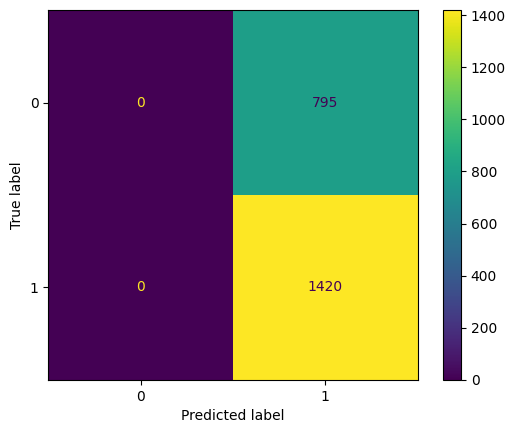

accuracy is  0.6410835214446953 

recall for class 1 (female) is  1.0 

precision for class 1 is  0.6410835214446953 

recall for class 0 (male) is  0.0 

precision for class 0 is  0.0 

f_score is for class 1 0.781292984869326 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:

### to study the accuracy of the classification model (without any hyperparameter tuning) 


from sklearn import metrics
from matplotlib import pyplot as plt

### confusion matrix
y_test=y_true
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
# display_labels=[0,1] ## (manual)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test,y_pred)
# recall= metrics.recall_score(y_test,y_pred,average='macro')
recall= metrics.recall_score(y_test,y_pred)
recall0= metrics.recall_score(y_test,y_pred,pos_label=0)

precision= metrics.precision_score(y_test,y_pred)
precision0= metrics.precision_score(y_test,y_pred,pos_label=0)

f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall for class 1 (female) is ',recall, '\n')
print('precision for class 1 is ',precision, '\n')
print('recall for class 0 (male) is ',recall0, '\n')
print('precision for class 0 is ',precision0, '\n')

print('f_score is for class 1',f_score, '\n')

# result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
# error_rate=1-accuracy
# train_accuracy=  metrics.accuracy_score(y_train,y_train_pred) 
# variance_measure=np.abs(train_accuracy - accuracy)
# print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

In [49]:
### confidence interval
error=1-accuracy
const=1.96 ## for 95% confidence interval
n= len(y_test)
delta= const * np.sqrt( (error * (1 - error)) / n)
print(delta)
confidence_interval=[round(np.positive(acc-delta),2),round(acc+delta,2)]
print(f'it is 95% likely that the model will have an accuracy in the interval of {confidence_interval} when predicting unseen data')

0.01997667536308177
it is 95% likely that the model will have an accuracy in the interval of [0.62, 0.66] when predicting unseen data


### flask

In [16]:
import tensorflow as tf
import tensorflow.keras as keras

In [17]:
final_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model')
img_resize_shape=(240,320)

In [42]:
### predicting a sample image 

sample_img_arr=cv2.imread('/content/Hands/Hands/Hand_0000267.jpg')
def preprocess_sample_img(img,img_size_tuple):
    img_resized_arr=cv2.resize(img,(320,240))
    img_resized_arr = np.expand_dims(img_resized_arr, axis=0)
    # img_resized_arr.shape
    return img_resized_arr


preprocessed_samp_img= preprocess_sample_img(sample_img_arr,(320,240))
sample_pred=final_model.predict(preprocess_sample_img(sample_img_arr,(320,240)))
prediction_probabilities = final_model(preprocessed_samp_img, training=False)[0]
node_val=sample_pred[0,0]

if node_val > 0.5 :
    label='female'
    confidence_leafpy=prediction_probabilities[0,0]
    # confidence= round((np.abs((node_val-0.5))/0.5)*100,3)
else:
    label='male'
    confidence_leafpy=1-prediction_probabilities[0,0]

    # confidence= round((np.abs((node_val-0.5))/0.5)*100,3)

output = {
    "label": label, 
    "confidence": confidence_leafpy
}

print(output)

1/1 [==============================] - 0s 325ms/step
{'label': 'female', 'confidence': 2.087}


In [43]:
print(prediction_probabilities)

tf.Tensor([0.5104368], shape=(1,), dtype=float32)


#### start of unnecessary

In [ ]:
# ! python --version

# ! apt install python3.9

In [ ]:
# ! ln -sf /usr/bin/python3.9 /usr/local/bin/python

In [ ]:
! which python
! python --version 

/usr/local/bin/python
Python 3.10.12


In [ ]:
##### ! update-alternatives --config python3 <<< $'2\n'
#### !apt install python3-pip

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
# ! python --version

Python 3.8.10


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 38 not upgraded.
Need to get 2,389 kB of archives.
After this operation, 4,933 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python-pip-whl all 20.0.2-5ubuntu1.8 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3-setuptools all 45.2.0-1ubuntu0.1 [330 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-wheel all 0.34.2-1ubuntu0.1 [23.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-pip all 20.0.2-5ubuntu1.8 [231 kB]
Fetched 2,389 kB in 1s (2,

     |████████████████████████████████| 797 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 52.8 MB/s 
     |████████████████████████████████| 117 kB 59.5 MB/s 
     |████████████████████████████████| 1.1 MB 48.1 MB/s 
     |████████████████████████████████| 385 kB 49.1 MB/s 
     |████████████████████████████████| 59 kB 3.7 MB/s 
     |████████████████████████████████| 100 kB 8.0 MB/s 
     |████████████████████████████████| 152 kB 4.3 MB/s 
     |████████████████████████████████| 3.1 MB 23.7 MB/s 
     |████████████████████████████████| 1.1 MB 68.8 MB/s 
     |████████████████████████████████| 93 kB 799 kB/s 
     |████████████████████████████████| 282 kB 60.1 MB/s 
     |████████████████████████████████| 426 kB 58.9 MB/s 
     |████████████████████████████████| 103 kB 59.9 MB/s 
     |████████████████████████████████| 48 kB 3.9 MB/s 
     |████████████████████████████████| 247 kB 50.9 MB/s 


#### end of unnecessary

In [28]:
## code source :  https://blog.devgenius.io/how-to-deploy-keras-models-to-production-beginners-welcome-1fbfab19d3f6
# Prevent ImportErrors w/ flask
! pip install werkzeug==2.0.3
# from collections.abc import MutableMapping

import werkzeug
werkzeug.cached_property = werkzeug.utils.cached_property
from werkzeug.datastructures import FileStorage
### ML/Data processing
# import tensorflow.keras as keras
# from tensorflow.keras.models import load_model
### RESTful API packages

# import flask.scaffold
# flask.helpers._endpoint_from_view_func = flask.scaffold._endpoint_from_view_func
! pip install flask==2.1.3
from flask import Flask
import flask.scaffold
flask.helpers._endpoint_from_view_func = flask.scaffold._endpoint_from_view_func
! pip install flask-restplus
from flask_restplus import Api, Resource
# from flask import Flask
import cv2

# Local utility Functions
# from util import leaf




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:

app = Flask(__name__)



api = Api(app, version="1.0", title="HandGender API",
description="Identify gender from hand images")
ns = api.namespace("Gender prediction from hand image", description="Predicts gender from hand image ")





<!--  -->

In [73]:


# app = Flask(__name__)



# api = Api(app, version="1.0", title="HandGender API",
# description="Identify gender from hand images")
# ns = api.namespace("namespace_name", description="namespace_desc_arjun")



# Use Flask-RESTPlus argparser to process user-uploaded images
arg_parser = api.parser()
arg_parser.add_argument('image', location='files', 
                        type=FileStorage, required=True)
# with open("./plantnet/inceptionModelArchitecture.json") as f:
#     model = keras.models.model_from_json(f.read())
#     model.load_weights("./plantnet/inception_model_weights.h5")# Add the route to run inference

# model=keras.models.load_model('./models/m_2023-06-03-1415_model')


model=final_model


from PIL import Image 
def get_image(arg_parser): ### see https://github.com/UPstartDeveloper/plantnet-api/blob/main/util/leaf.py
    '''Returns a Pillow Image given the uploaded image.'''
    args = arg_parser.parse_args()
    image_file = args.image  # reading args from file
    # print(image_file.type())
    return Image.open(image_file) 

# def preprocess_img_to_load_into_model(img,img_resize_shape)
#     img_resized_arr=cv2.resize(img,(320,240))
#     img_resized_arr = np.expand_dims(img_resized_arr, axis=0)
#     # img_resized_arr.shape
#     return img_resized_arr

# import tensorflow as tf 
def preprocess_img_to_load_into_model(image,img_resize_shape):
    """Converts a PIL.Image into a Tensor of the 
    right dimensions 
    """
    tensor_image = keras.preprocessing.image.img_to_array(image)
    resized_img = tf.image.resize(tensor_image, [img_resize_shape[0], img_resize_shape[1]])
    final_input = np.expand_dims(resized_img, axis=0)
    return final_input


@ns.route("/prediction")
class CNNPrediction(Resource):
    """Takes in the image, to pass to the CNN"""
    @api.doc(parser=arg_parser, 
             description="Upload dorsal or ventral image of hand with a clear background to predict gender of the person to which the hand belongs.")
    def post(self):
        # A: get the image
        image = get_image(arg_parser)
        
        # B: preprocess the image
        # final_image = leaf.preprocess_image(image)
        # preprocessed_image=cv2.resize(image,(240,320))
        preprocessed_image=preprocess_img_to_load_into_model(image,img_resize_shape)

        # C: make the prediction
        # prediction = leaf.predict_leaf_health(model, final_image)
        node_arr = model.predict(preprocessed_image)
        
        node_val=node_arr[0,0]
        if node_val > 0.5 :
            label='female'
            confidence= round((np.abs((node_val-0.5))/0.5)*100,3)
        else:
            label='male'
            confidence= round((np.abs((node_val-0.5))/0.5)*100,3)

        output = {
            "label": label, 
            "confidence": f'{confidence}%'
        }
        # prediction='test_string'
        ##### return the classification
        return output





In [52]:
# app.run()

In [32]:
# !pip install flask-ngrok
# !pip install flask-bootstrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### got from https://stackoverflow.com/questions/70342717/colab-unable-to-access-webpage-using-flask-ngrok
# ! pip install pyngrok==4.1.1
# ! ngrok authtoken '2R2XpYI71tb0zvlkZgAtXyFLJSt_4DYRZFVTDxumD2bNABgxv'

In [ ]:
from flask_ngrok import run_with_ngrok


In [74]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bd15-34-32-174-204.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:02] "GET /swaggerui/swagger-ui-bundle.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:02] "GET /swaggerui/droid-sans.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:02] "GET /swaggerui/swagger-ui-standalone-preset.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:02] "GET /swaggerui/swagger-ui.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:05] "GET /swaggerui/favicon-16x16.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:29:05] "GET /swagger.json HTTP/1.1" 200 -


1/1 [==============================] - 0s 456ms/step


INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 05:36:40] "POST /Gender%20prediction%20from%20hand%20image/prediction HTTP/1.1" 200 -


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=5f343dcc397a886c53e1e49640d29d7cb0e2901b2df16453fb938030f0f5e407
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [56]:
  # from flask import Flask
  # from flask_ngrok import run_with_ngrok

  # app = Flask(__name__)
  # run_with_ngrok(app)  # Start ngrok when app is run

  # @app.route("/")
  # def hello():
  #     return "Hello World!"

  # if __name__ == '__main__':
  #     app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://39d9-34-32-174-204.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 02:48:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2023 02:48:37] "GET /favicon.ico HTTP/1.1" 404 -


### OTHER THINGS

In [ ]:
with open(f'{drive_project_folder_path}/models/{model_name}_info.txt','a') as f:
    f.write(f'''
        m_2023-06-03-1415 model
        trained on small_train using .take(100)
        aimed for 100 epochs
        accuracy seems to be stuck at 65% after 68 epochs
        so trying to not use reducelearningrate_on_plateau and start with default adam
        learning rate (probably 0.001) - did 13 more epochs with that but still no improvement
        Saved with total 81 epoch model
        loaded that saved model ; now let's train with SGD as optimizer [[2023-06-03]]-2143-52
        trained 10 epochs with sgd as optimizer; and saved the model as m_2023-06-03-1415_model [[2023-06-03]]-2159-55

        reduced the batch size to 8 [[2023-06-03]]-2206-07 and added the lr plateau callback 

        OVERNIGHT TRAINING COMPLETE {datetime.now()}

    ''')

In [ ]:
clear_gdrive_trash()
from keras.optimizers import SGD, Adam,RMSprop
final_model.compile(
    optimizer=RMSprop(0.01),
    # optimizer=RMSprop(lr=0.01),

    # optimizer=SGD(lr=0.01),
    # optimizer=Adam(lr=0.001),

    loss="binary_crossentropy",
    metrics=["accuracy"]
)
# callbacks_list=[backup_callback,reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
callbacks_list=[reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[csvlogger_callback]
with open(f'{drive_project_folder_path}/models/{model_name}_info.txt','a') as f:
    f.write(f'''
        m_2023-06-03-1415 model
        trained on small_train using .take(100)
        aimed for 100 epochs
        accuracy seems to be stuck at 65% after 68 epochs
        so trying to not use reducelearningrate_on_plateau and start with default adam
        learning rate (probably 0.001) - did 13 more epochs with that but still no improvement
        Saved with total 81 epoch model
        loaded that saved model ; now let's train with SGD as optimizer [[2023-06-03]]-2143-52
        trained 10 epochs with sgd as optimizer; and saved the model as m_2023-06-03-1415_model [[2023-06-03]]-2159-55

        reduced the batch size to 8 [[2023-06-03]]-2206-07 and added the lr plateau callback 

        OVERNIGHT TRAINING COMPLETE 
        
        {datetime.now()} starting second phase rmsprop ; start from lr=0.01 ;with lrplateau; 100 epochs
      

    ''')
# callbacks_list=[]
final_model.fit(
    # train_img_set_tfds,
    small_train,
    # y=y_gen_enc,
    epochs=100,
    validation_data=test_img_set_tfds,
    # batch_size=5,
    class_weight={0:(1/3967), 1:(1/7109)},
    callbacks=[callbacks_list]
)


0
Epoch 1/100
400/400 [==============================] - 108s 229ms/step - loss: 1.7744e-04 - accuracy: 0.5525 - val_loss: 0.6986 - val_accuracy: 0.3670 - lr: 0.0100
Epoch 2/100
400/400 [==============================] - 90s 225ms/step - loss: 1.2736e-04 - accuracy: 0.5587 - val_loss: 0.6888 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 3/100
400/400 [==============================] - 90s 225ms/step - loss: 1.2457e-04 - accuracy: 0.5878 - val_loss: 0.6888 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 4/100
400/400 [==============================] - 91s 226ms/step - loss: 1.2453e-04 - accuracy: 0.5953 - val_loss: 0.6889 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 5/100
400/400 [==============================] - 91s 225ms/step - loss: 1.2461e-04 - accuracy: 0.6094 - val_loss: 0.6916 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 6/100
400/400 [==============================] - 90s 225ms/step - loss: 1.2462e-04 - accuracy: 0.5725 - val_loss: 0.6911 - val_accuracy: 0.6330 - lr: 0.0100
Epoch 7/100
400/400

In [ ]:
final_model.save(f'{drive_project_folder_path}/models/{model_name}_model_second_phase')

In [ ]:
# print(f'{drive_project_folder_path}/models/new_architecture')

In [ ]:
# ! du -sh '/content/drive/MyDrive/ML-AI_capstone_project/models/new_architecture' | awk '{print $1}'

In [ ]:
# col_val_list_in_order_file_names_dict['id']

### Navoneel

In [ ]:
# img_resize_shape=(240,320)
img_resize_shape=(1000,1000)
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

test_fraction=0.2
seed=12
train_img_set_tfds, test_img_set_tfds=image_dataset_from_directory(
    dataset_dir_path,
    labels=y_gen_enc_np.flatten().tolist(),
    # labels=None,

    validation_split=test_fraction,
    subset='both',
    seed=seed,
    image_size=img_resize_shape,
    batch_size=32
    )

In [ ]:

def net_for_feature_extraction(img_size_tuple):
    input_layer=Input(shape=img_size_tuple )

    ## to convert images to grayscale
    # import keras_cv
    # keras_cv.layers.Grayscale(output_channels=1) ## see https://keras.io/api/keras_cv/layers/preprocessing/grayscale/


    data_augmentation = Sequential( ### see https://keras.io/api/layers/preprocessing_layers/image_augmentation/
        [
            RandomFlip("horizontal"),
            RandomRotation(0.1),
            # keras.layers.RandomCrop( height=120,width=100) ## not good might cut off fingers when cropping
            # keras.layers.RandomZoom(height=(-0.3,0.3)) ## won't help in basic learning ; required only when trying to learn random internet images

        ]
    ) ## see https://keras.io/examples/vision/image_classification_from_scratch/
    x=data_augmentation(input_layer)
    x = Rescaling(1./255)(x)

    '''
    x= Conv2D(32, (3, 3), padding="same",activation='relu')(x)
    x= MaxPooling2D(pool_size=(2, 2))(x)
    x= MaxPooling2D(pool_size=(3, 3))(x)

    # x=keras.layers.BatchNormalization()(x)
    x= Conv2D(32, (3, 3), padding="same",activation='relu')(x)
    '''
    x= Conv2D(32, (3, 3), padding="same",activation='relu',strides=(3,3))(x)
    x= MaxPooling2D(pool_size=(2, 2))(x)
    x= Conv2D(32, (3, 3), padding="same",activation='relu',strides=(3,3))(x)
    x= MaxPooling2D(pool_size=(2, 2))(x)
    x= Conv2D(32, (3, 3), padding="same",activation='relu',strides=(3,3))(x)
    x= MaxPooling2D(pool_size=(2, 2))(x)
    # x= Dropout(512/800)(x)
    x= Flatten()(x)



    # x= MaxPooling2D(pool_size=(2, 2))(x)



    # conv_nodes=(16,32,64)
    # ##see  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
    # for f in conv_nodes:
    #     x= Conv2D(f, (3, 3), padding="same",activation='relu')(x)
    #     # x = Activation("relu")(x)
    #     # x = BatchNormalization(axis=chanDim)(x)
    #     x= MaxPooling2D(pool_size=(3, 3))(x)
    #     # x= Dropout(0.2)(x)
    # x= Flatten()(x)
    # x = Dense(32,activation='relu')(x)

    # x= Dense(16,activation='relu')(x)

    # x =Dense(4,activation='relu')(x)
    img_net=Model(inputs=[input_layer],outputs=x)
    return img_net 
# navoneel_model=net_for_feature_extraction(img_size_tuple)
# navoneel_model.summary()

In [ ]:

### training
from keras.optimizers import SGD, Adam,RMSprop
navoneel_model.compile(
    optimizer=Adam(),
    # optimizer=RMSprop(lr=0.01),

    # optimizer=SGD(lr=0.01),
    # optimizer=Adam(lr=0.001),

    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
callbacks_list=[csvlogger_callback]

# callbacks_list=[]
navoneel_model.fit(
    # train_img_set_tfds,
    small_train,
    # y=y_gen_enc,
    epochs=50,
    # validation_data=test_img_set_tfds,
    # batch_size=5,
    class_weight={0:(1/3967), 1:(1/7109)},
    callbacks=[callbacks_list]
)
clear_gdrive_trash()